In [3]:
import numpy as np
import scipy.ndimage as snd

import matplotlib.pyplot as plt
%matplotlib inline

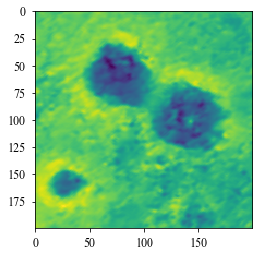

In [6]:
image = np.load('../img0.npy')
plt.figure()
plt.imshow(image)
plt.show()

In [2]:
data = np.load('../img0_c5.npy')

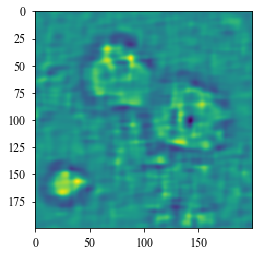

In [4]:
plt.figure()
plt.imshow(data)
plt.show()

In [9]:
kernel1d = np.array([0.5,0,-0.5]) #non-intuitive,does k[-1]*in[1] matches gradient
kernel_diag = np.array([[np.sqrt(2)/2,0,0],[0,0,0],[0,0,-np.sqrt(2)/2]]) #xy
kernel_diagf = np.fliplr(kernel_diag).T #flipped xy

def derivs(arr):
    dx = snd.convolve1d(arr,kernel1d,axis=1)
    dy = snd.convolve1d(arr,kernel1d,axis=0)
    dxy = snd.convolve(arr,kernel_diag)
    dyx = snd.convolve(arr,kernel_diagf)
    dx2 = snd.convolve1d(dx,kernel1d,axis=1)
    dy2 = snd.convolve1d(dy,kernel1d,axis=0)
    dxy2 = snd.convolve(dxy,kernel_diag)
    dyx2 = snd.convolve(dyx,kernel_diagf)
    return dx,dy,dxy,dyx,dx2,dy2,dxy2,dyx2

In [10]:
deriv_list = derivs(data)

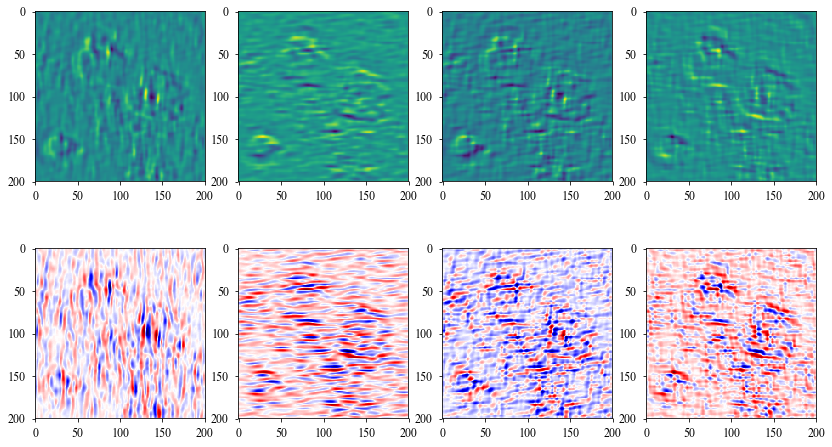

In [14]:
fig,ax = plt.subplots(2,4,figsize=(14,8))
for i,div in enumerate(deriv_list[0:4]):
    ax[0,i].imshow(div)
for j,div in enumerate(deriv_list[4:]):
    ax[1,j].imshow(div,cmap='seismic')
plt.show()

In [36]:
testkern = 1/60.*np.array([1.,-9.,45.,0.,-45.,9.,-1,])
tdx = snd.convolve1d(data,testkern,axis=1)
tdy = snd.convolve1d(data,testkern,axis=0)
tdx2 = snd.convolve1d(tdx,testkern,axis=1)
tdy2 = snd.convolve1d(tdy,testkern,axis=0)

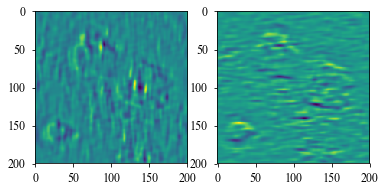

In [37]:
pf,pa = plt.subplots(1,2)
pa[0].imshow(tdx)
pa[1].imshow(tdy)
plt.show()

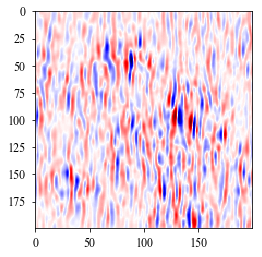

In [42]:
plt.figure()
plt.imshow(tdx2,cmap='seismic')
plt.show()

In [43]:
import sys

In [44]:
import os